## Forecasting - CocaCola prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

import warnings
warnings.filterwarnings('ignore')

In [2]:
cocacola=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<AxesSubplot:xlabel='Sales'>

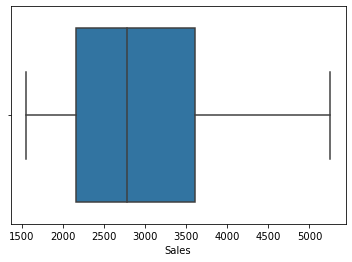

In [3]:
sns.boxplot('Sales',data=cocacola)

## Moving average

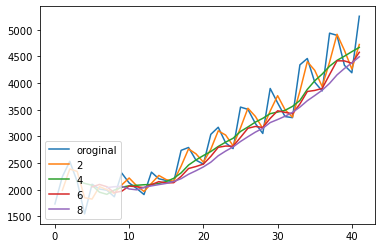

In [4]:
cocacola.Sales.plot(label="oroginal")
for i in range(2,10,2):
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)    

## ACF plot and PACF plot

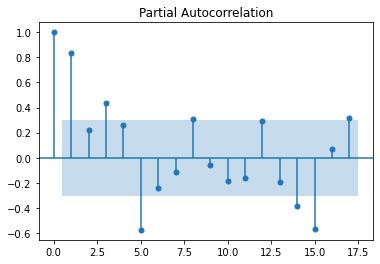

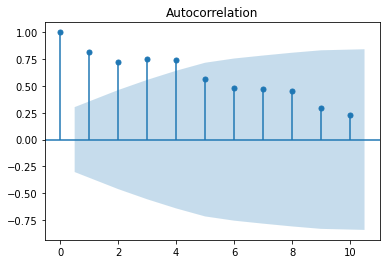

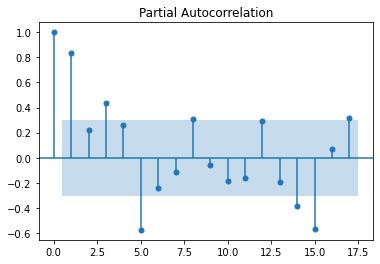

In [5]:
tsa_plots.plot_acf(cocacola.Sales,lags=10)
tsa_plots.plot_pacf(cocacola.Sales)

In [6]:
# Train and split (random split)

Train=cocacola.head(48)
Test=cocacola.tail(12)

In [7]:
def MAPE(pred,org):
    temp=np.abs((pred-org))*100/org
    return np.mean(temp)

##  Simple Exponential Method

In [8]:
ses_model=SimpleExpSmoothing(Train['Sales']).fit()
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ses,Test.Sales)

9.68200492651463

# Holt Method

In [9]:
hw_model=Holt(Train['Sales']).fit()
pred_hw=hw_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hw,Test.Sales)

11.025182440957998

### Holt winter exponential smoothing with additive seasonal and additive trend

In [10]:
hwe_model_add_add=ExponentialSmoothing(Train['Sales'],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add=hwe_model_add_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

3.245837019668915

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [11]:
hwe_model_mul_add=ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add=hwe_model_mul_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.8845556504947196

Different method Vizualization

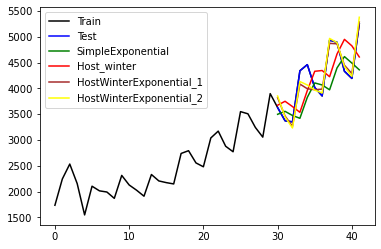

In [13]:
plt.plot(Train.index,Train['Sales'],label='Train',color='black')
plt.plot(Test.index,Test['Sales'],label='Test',color='blue')
plt.plot(pred_ses.index,pred_ses,label='SimpleExponential',color='green')
plt.plot(pred_hw.index,pred_hw,label='Host_winter',color='red')
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label='HostWinterExponential_1',color='brown')
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label='HostWinterExponential_2',color='yellow')
plt.legend(loc='best')

According to above methods Host winter exponential smoothing with 
multiplicative seasonality and additive trend is Best method ( Less MAPE value)